# Visualizing the Caribbean SST-rainfall relationship

In [10]:
# Package imports
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr


## Retrieve observations

In [16]:
# Import ERSSTv5 data using xarray
car_sst = pd.read_csv(datdir+'../data/seasonal_indices/monthly_caribbean_sst_index_1900to2024.csv', header='infer').set_index('time').to_xarray()['car_sst']
car_precip = pd.read_csv('../data/seasonal_indices/monthly_caribbean_prcp_index_1900to2024.csv', header='infer').set_index('time').to_xarray()['car_prcp']

# Convert time coordinate to datetime objects
car_sst['time'] = pd.to_datetime(car_sst['time'].values)
car_precip['time'] = pd.to_datetime(car_precip['time'].values)

## Calculate linear and nonlinear fit
Let's define the climate norms we're interested in visualizing. Below, we use the consecutive climate norms 1931-1960, 1961-1990 and 1991-2020. Then, using the entire 1900-2024 data, we determine the non-linear fit.

In [18]:
from scipy.optimize import curve_fit

# --- Define climate norms ---
clim_norm1 = np.arange(1931, 1961, 1)
clim_norm2 = np.arange(1961, 1991, 1)
clim_norm3 = np.arange(1991, 2021, 1)

# --- Non-linear fit ---
# Define the polynomial function for fitting
def polynomial_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Perform the curve fitting
popt, pcov = curve_fit(polynomial_func, car_sst.values, car_precip.values)

# Extract the fitted coefficients
a, b, c, d = popt

# Generate x-values for the fitted curve
x_fit = np.linspace(car_sst.values.min(), car_sst.values.max(), 100)

# Calculate y-values for the fitted curve
y_fit = polynomial_func(x_fit, a, b, c, d)


## Plot the schematic using data

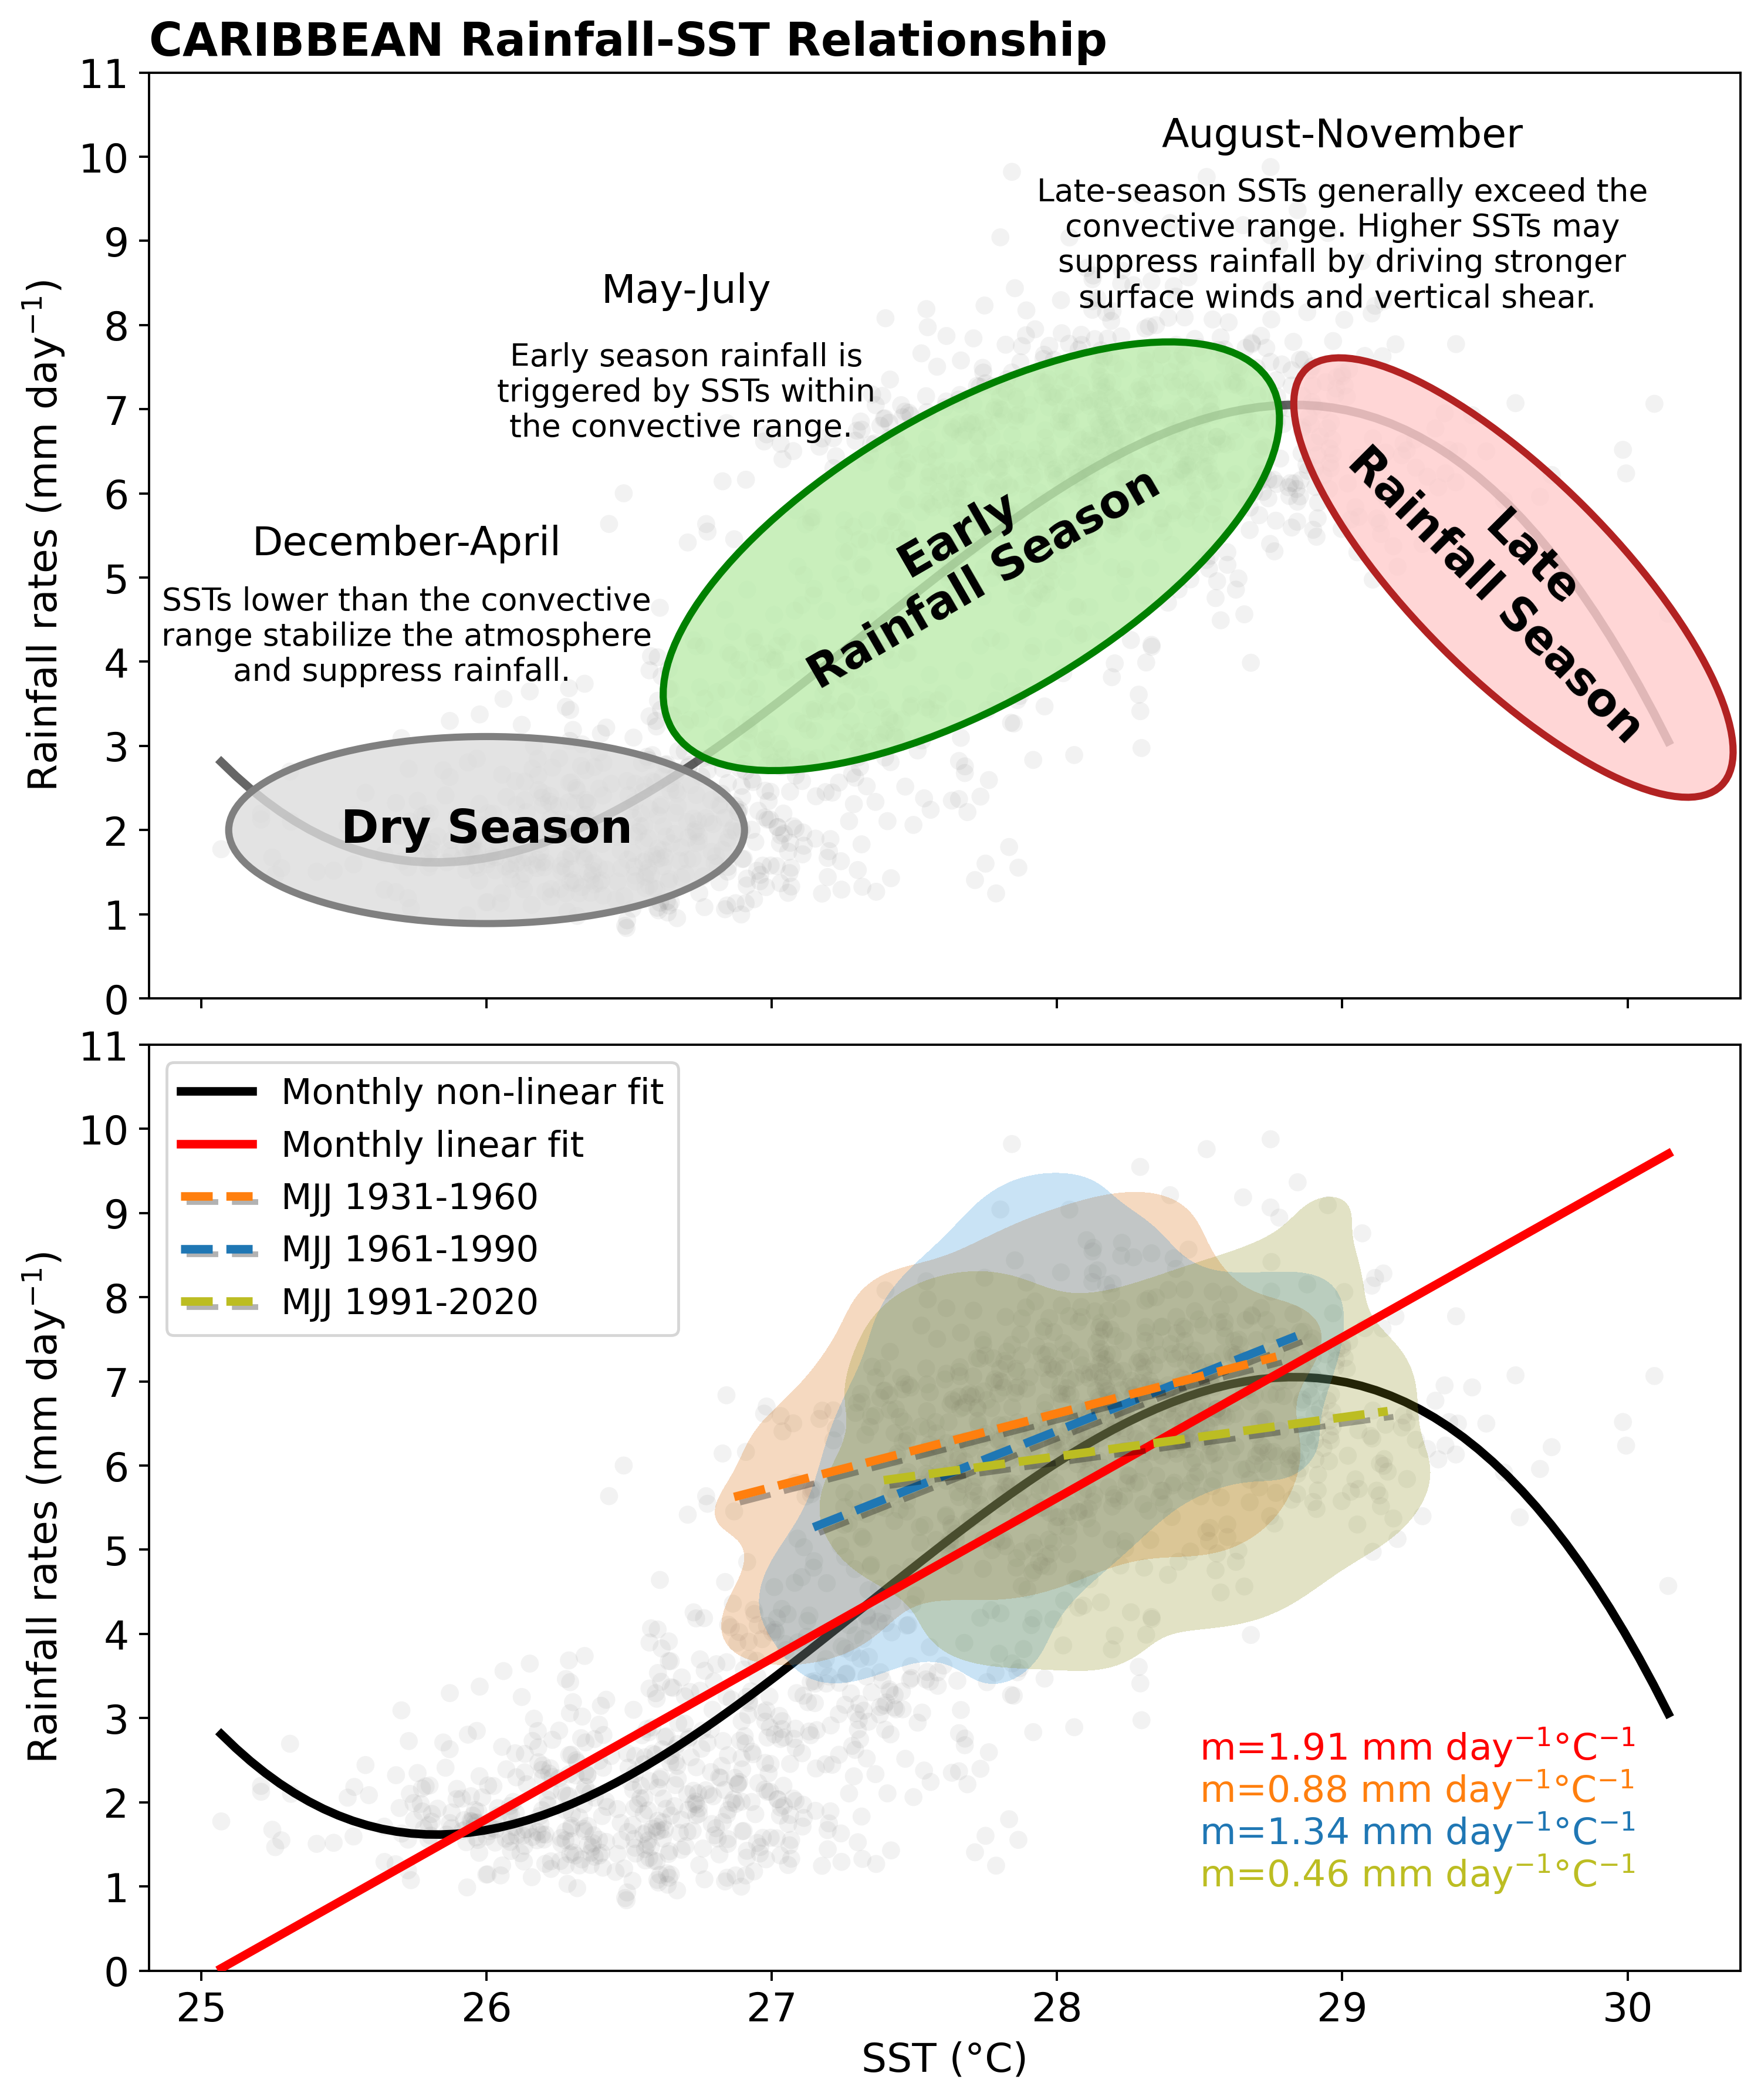

FileNotFoundError: [Errno 2] No such file or directory: '../figures/figure1-sst-rainfall-schematic.pdf'

In [19]:
# Generate code to plot the precipitation-sst plot above as a kernel density estimate plot using matplotlib.
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import scipy.odr as odr

from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

fig = plt.figure(figsize=(10, 12), dpi=350)

### --- 1ST SUBPLOT ---
plt.subplot(211)
plt.title('CARIBBEAN Rainfall-SST Relationship', loc='left', fontsize=16, fontweight='bold')
plt.scatter(car_sst.values, car_precip.values, s=40, edgecolors='none', color='gray', alpha=0.1, zorder=1)

# Non-linear plot
plt.plot(x_fit, y_fit, lw=3, ls='-', color='black', alpha=0.6, label='Monthly non-linear fit (1900-2024)')

# Bubbles and annotations
# dry season
plt.text(25.72, 5.4, "December-April", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
plt.text(25.72, 4.3, "SSTs lower than the convective\nrange stabilize the atmosphere\nand suppress rainfall. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)

plt.text(26, 2, "Dry Season", size=16, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=0.8,
                   ec="gray",
                   fc=(0.8627450980392157, 0.8627450980392157, 0.8627450980392157, 0.8),
                   lw=2.5,
                   mutation_aspect=1.2,
                   ),
         fontweight="bold"
         )

# early rainfall season
plt.text(26.7, 8.4, "May-July", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
plt.text(26.7, 7.2, "Early season rainfall is\ntriggered by SSTs within\nthe convective range. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
plt.text(27.7, 5.25, "Early\nRainfall Season", size=16, rotation=30.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=1,
                   ec="green",
                   fc=(0.7372549019607844, 0.9254901960784314, 0.6745098039215687, 0.8),
                   lw=2.5,
                   mutation_aspect=1.2,
                   ),
         fontweight="bold"
         )

# late rainfall season
plt.text(29, 10.25, "August-November", size=14,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
plt.text(29, 8.95, "Late-season SSTs generally exceed the\nconvective range. Higher SSTs may\nsuppress rainfall by driving stronger\nsurface winds and vertical shear. ", size=11,
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   pad=0.8,
                   ec="none",
                   fc="none",
                   alpha=0.,
                   )
)
plt.text(29.6, 5,
         "Late\nRainfall Season", size=16, rotation=-45.,
         ha="center", va="center",
         bbox=dict(boxstyle="ellipse",
                   pad=0.2,
                   ec="firebrick",
                   fc=(1., 0.8, 0.8, 0.8),
                   lw=2.5,
                   mutation_aspect=2.5,
                   ),
         fontweight="bold"
         )

plt.ylim(0,11)
plt.yticks(np.arange(0, 12, 1))
plt.tick_params(labelsize=14, labelbottom=False)
plt.ylabel('Rainfall rates (mm day$^{-1}$)', fontsize=14)

### --- 2ND SUBPLOT ---
plt.subplot(212)

# --- Scatter plot ---
plt.scatter(car_sst.values, car_precip.values, s=40, edgecolors='none', color='gray', alpha=0.1, zorder=1)

plt.plot(x_fit, y_fit, lw=3, ls='-', color='black', label='Monthly non-linear fit', zorder=1)

# --- Linear fit for all data ---
# UNCOMMENT for monthly May-July values
# x = car_sst.sel(time=car_sst.time.dt.month.isin([5,6,7])).values
# y = car_precip.sel(time=car_precip.time.dt.month.isin([5,6,7])).values

x = car_sst.values
y = car_precip.values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

trend = np.polyfit(xy[:,0], xy[:,1], 1)  # 1 for linear
trend_line = np.poly1d(trend)
plt.plot(xy[:,0], trend_line(xy[:,0]), color='red', ls='-', lw=3, label='Monthly linear fit', zorder=3)

# Add annotations to lower right corner
plt.annotate('m='+str(np.round(trend[0], decimals=2))+' mm day$^{-1}$°C$^{-1}$', xy=(28.5,2.5), fontsize=13, color='red')

## --- Climate norm 1 ---
early_sst = car_sst.sel(time=car_sst.time.dt.year.isin(clim_norm1))
early_precip = car_precip.sel(time=car_precip.time.dt.year.isin(clim_norm1))
sns.kdeplot(x=early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, y=early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values, color='tab:orange', levels=2, fill=True, alpha=0.25, legend=True)

# linear fit for norm 1
x = early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values
y = early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

trend = np.polyfit(xy[:,0], xy[:,1], 1)  # 1 for linear
trend_line = np.poly1d(trend)
plt.plot(xy[:,0], trend_line(xy[:,0]), color='tab:orange', lw=3, ls='--', label='MJJ 1931-1960', path_effects=[SimpleLineShadow(shadow_color="black", linewidth=2),Normal()], zorder=3)

# Add annotations to lower right corner
plt.annotate('m='+str(np.round(trend[0], decimals=2))+' mm day$^{-1}$°C$^{-1}$', xy=(28.5,2.), fontsize=13, color='tab:orange')

## --- Climate norm 2 ---
early_sst = car_sst.sel(time=car_sst.time.dt.year.isin(clim_norm2))
early_precip = car_precip.sel(time=car_precip.time.dt.year.isin(clim_norm2))
sns.kdeplot(x=early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, y=early_precip.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, color='tab:blue', levels=2, fill=True, alpha=0.25)

# linear fit for norm 2
x = early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values
y = early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

trend = np.polyfit(xy[:,0], xy[:,1], 1)  # 1 for linear
trend_line = np.poly1d(trend)
plt.plot(xy[:,0], trend_line(xy[:,0]), color='tab:blue', lw=3, ls='--', label='MJJ 1961-1990', path_effects=[SimpleLineShadow(shadow_color="black", linewidth=2),Normal()])

# Add annotations to lower right corner
plt.annotate('m='+str(np.round(trend[0], decimals=2))+' mm day$^{-1}$°C$^{-1}$', xy=(28.5,1.5), fontsize=13, color='tab:blue')


## --- Climate norm 3 ---
early_sst = car_sst.sel(time=car_sst.time.dt.year.isin(clim_norm3))
early_precip = car_precip.sel(time=car_precip.time.dt.year.isin(clim_norm3))
sns.kdeplot(x=early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, y=early_precip.sel(time=early_sst.time.dt.month.isin([5,6,7])).values, color='tab:olive', levels=2, fill=True, alpha=0.25)

# linear fit for norm 3
x = early_sst.sel(time=early_sst.time.dt.month.isin([5,6,7])).values
y = early_precip.sel(time=early_precip.time.dt.month.isin([5,6,7])).values
xy = zip(x, y)
xy = np.array(sorted(xy, key = lambda x: x[0]))

trend = np.polyfit(xy[:,0], xy[:,1], 1)  # 1 for linear
trend_line = np.poly1d(trend)
plt.plot(xy[:,0], trend_line(xy[:,0]), color='tab:olive', lw=3, ls='--', label='MJJ 1991-2020', path_effects=[SimpleLineShadow(shadow_color="black", linewidth=2),Normal()], zorder=3)

# Add annotations to lower right corner
plt.annotate('m='+str(np.round(trend[0], decimals=2))+' mm day$^{-1}$°C$^{-1}$', xy=(28.5,1.), fontsize=13, color='tab:olive')

plt.ylim(0,11)
plt.yticks(np.arange(0, 12, 1))
plt.xlabel('SST (°C)', fontsize=14)
plt.ylabel('Rainfall rates (mm day$^{-1}$)', fontsize=14)

plt.tick_params(labelsize=14)
plt.legend(loc='upper left', fontsize=12.5)

plt.subplots_adjust(hspace=0.05)
plt.show()

## --- Save figure ---
fig.savefig('../figures/figure1-sst-rainfall-schematic.pdf', dpi=300, format='pdf', bbox_inches='tight')